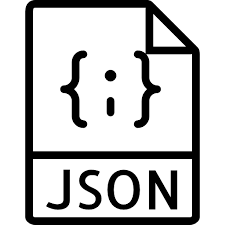

# Learning Objectives

- Load and explore a .json file in Python
- Create a clean data structure from a .json file
- Conduct descriptive analysis
- Visualize the results

Part of being a good data scientist is having the capacity to work with data in many different forms. Much data online is stored in JSON format. So let's see if we can conduct a descriptive analysis of data when it's given to us in that form!

## What is JSON?

JSON stands for Java Script Object Notation. 

JSON objects are one common way that data is transmitted over the web.  It is notable for being lightweight, which makes it [preferred](https://stackoverflow.com/questions/383692/what-is-json-and-why-would-i-use-it), generally, over XML.

```json
{"menu": {
  "id": 12412,
  "istest": true,
  "value": "File",
  "popup": {
    "menuitem": [
      {"value": "New", "onclick": "CreateNewDoc()"},
      {"value": "Open", "onclick": "OpenDoc()"},
      {"value": "Close", "onclick": "CloseDoc()"}
    ]
  }
}}
```

## JSON Format

JSON objects store data in a format similar to a nested Python dictionary. The JSON format makes it easy to store as a file, transfer between users, and use in other languages.

For more information about the syntax of JSON files, check out this [link](https://www.json.org/json-en.html) to the JSON website.

Can have these types in it (all relatable to Python types):

|JavaScript|JS Example               |Python Equivalent|Python Example           |
|----------|-------------------------|-----------------|-------------------------|
|Objects   |`{'key0':'v12','v':1}`   |Dictionaries     |`{'key0':'v12','v':1}`   |
|Arrays    |`[1, 'one', 'two', 3, 5]`|Lists            |`[1, 'one', 'two', 3, 5]`|
|Strings   |`'One'` or `"Two"`       |Strings          |`'One'` or `"Two"`       |
|Numbers   |`1234.5` or `8675309`    |Numbers          |`1234.5` or `8675309`    |  
|Boolean   |`true` or `false`        |Boolean          |`True` or `False`        |
|Null Value|`null`                   |None Value       |`None`                   |

# Loading a JSON File

For this example, we've created a `new_releases.json` file containing data on 20 newly released music albums. We got this from the Spotify API - we'll explain what this means later. 

Let's begin by importing the `json` package, opening a file with python's `open()` function, and then loading that data from the JSON file into a new `data` object.

In [1]:
# We'll need to import the json package first
import json

In [2]:
# Now use with open to load the file
with open('data/new_releases.json') as file:
    data = json.load(file)

In [ ]:
open_file = open('data/new_releases.json')
data = json.load(open_file)
open_file.close()

In [3]:
type(data)

dict

In [1]:
data

NameError: name 'data' is not defined

The Spotify API returned the data in the form of JSON object, which the `json` module transforms into a Python object.

## Exploring JSON Schemas  

Recall that JSON files have a nested structure. The deepest levels of our object will contain individual values: numbers, booleans or strings. These in turn will be stored in the equivalents of Python lists and dictionaries, usually with many levels of nesting. 

If you try to look at a raw JSON file, you will likely have a hard time understanding the structure. To more easily make sense of it, we will proceed through each level methodically.

In [4]:
# This will look messy
print(data)

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20', 'items': [{'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'}, 'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i', 'id': '1RyvyyTE3xzB2ZywiAwp0i', 'name': 'Future', 'type': 'artist', 'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}], 'available_markets': ['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH', 'BO', 'BR', 'CA', 'CH', 'CL', 'CO', 'CR', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HK', 'HN', 'HU', 'ID', 'IE', 'IL', 'IN', 'IS', 'IT', 'JO', 'JP', 'KW', 'LB', 'LI', 'LT', 'LU', 'LV', 'MA', 'MC', 'MT', 'MX', 'MY', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'SA', 'SE', 'SG', 'SK', 'SV', 'TH', 'TN', 'TR', 'TW', 'US', 'UY', 'VN', 'ZA'], 'external_urls': {'spotify': 'https://open.spotify.com/album/4bNPOFOzxGhF5jhfIK6lit'}, 'href'

In [5]:
# One way to make it easier to read
print(json.dumps(data, indent=2))

{
  "albums": {
    "href": "https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20",
    "items": [
      {
        "album_type": "album",
        "artists": [
          {
            "external_urls": {
              "spotify": "https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i"
            },
            "href": "https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i",
            "id": "1RyvyyTE3xzB2ZywiAwp0i",
            "name": "Future",
            "type": "artist",
            "uri": "spotify:artist:1RyvyyTE3xzB2ZywiAwp0i"
          }
        ],
        "available_markets": [
          "AD",
          "AE",
          "AR",
          "AT",
          "AU",
          "BE",
          "BG",
          "BH",
          "BO",
          "BR",
          "CA",
          "CH",
          "CL",
          "CO",
          "CR",
          "CY",
          "CZ",
          "DE",
          "DK",
          "DO",
          "DZ",
          "EC",
          "EE",
          "EG",
       

In [6]:
# Using the default Jupyter Notebook's display() helps
display(data) 
# Uncomment this to do the same as just displaying the last line
# data

{'albums': {'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
  'items': [{'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
      'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
      'id': '1RyvyyTE3xzB2ZywiAwp0i',
      'name': 'Future',
      'type': 'artist',
      'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
    'available_markets': ['AD',
     'AE',
     'AR',
     'AT',
     'AU',
     'BE',
     'BG',
     'BH',
     'BO',
     'BR',
     'CA',
     'CH',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DE',
     'DK',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'FI',
     'FR',
     'GB',
     'GR',
     'GT',
     'HK',
     'HN',
     'HU',
     'ID',
     'IE',
     'IL',
     'IN',
     'IS',
     'IT',
     'JO',
     'JP',
     'KW',
     'LB',
     'LI',
     'LT',
     'LU',
     'LV',
     'MA',
     

To start exploring, let's check the type of our new `data` object and start mapping out the hierarchy.

In [7]:
# How can we access the keys?
data.keys()

dict_keys(['albums'])

In this case, there is only a single key, 'albums', so we'll continue on down the pathway exploring and mapping out the hierarchy. Once again, let's start by checking the type of this nested data structure.

In [8]:
data.get('albums')

{'href': 'https://api.spotify.com/v1/browse/new-releases?offset=0&limit=20',
 'items': [{'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
     'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
     'id': '1RyvyyTE3xzB2ZywiAwp0i',
     'name': 'Future',
     'type': 'artist',
     'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
   'available_markets': ['AD',
    'AE',
    'AR',
    'AT',
    'AU',
    'BE',
    'BG',
    'BH',
    'BO',
    'BR',
    'CA',
    'CH',
    'CL',
    'CO',
    'CR',
    'CY',
    'CZ',
    'DE',
    'DK',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'ES',
    'FI',
    'FR',
    'GB',
    'GR',
    'GT',
    'HK',
    'HN',
    'HU',
    'ID',
    'IE',
    'IL',
    'IN',
    'IS',
    'IT',
    'JO',
    'JP',
    'KW',
    'LB',
    'LI',
    'LT',
    'LU',
    'LV',
    'MA',
    'MC',
    'MT',
    'MX',
    'MY',
    'NI',
    'NL',
    'NO',
 

In [9]:
type(data.get('albums'))

dict

In [10]:
data.get('albums').keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

At this point, things are starting to look something like this: 

![](images/json_diagram1.jpg)

If we were to continue checking individual data types, we'd have a lot to go through. To simplify this, let's use a `for` loop:

In [11]:
for key, value in data['albums'].items():
    print(key, type(value))

href <class 'str'>
items <class 'list'>
limit <class 'int'>
next <class 'str'>
offset <class 'int'>
previous <class 'NoneType'>
total <class 'int'>


Adding this to our diagram, we now have something like this:

![](images/json_diagram2.jpg)

Let's look at the `items` list - this contains the album information. 

In [12]:
type(data['albums']['items'])

list

In [13]:
data[0]

KeyError: 0

In [14]:
data['albums'][0]

KeyError: 0

In [15]:
# How can I grab the first entry?
data['albums']['items'][0]

{'album_type': 'album',
 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
   'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
   'id': '1RyvyyTE3xzB2ZywiAwp0i',
   'name': 'Future',
   'type': 'artist',
   'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}],
 'available_markets': ['AD',
  'AE',
  'AR',
  'AT',
  'AU',
  'BE',
  'BG',
  'BH',
  'BO',
  'BR',
  'CA',
  'CH',
  'CL',
  'CO',
  'CR',
  'CY',
  'CZ',
  'DE',
  'DK',
  'DO',
  'DZ',
  'EC',
  'EE',
  'EG',
  'ES',
  'FI',
  'FR',
  'GB',
  'GR',
  'GT',
  'HK',
  'HN',
  'HU',
  'ID',
  'IE',
  'IL',
  'IN',
  'IS',
  'IT',
  'JO',
  'JP',
  'KW',
  'LB',
  'LI',
  'LT',
  'LU',
  'LV',
  'MA',
  'MC',
  'MT',
  'MX',
  'MY',
  'NI',
  'NL',
  'NO',
  'NZ',
  'OM',
  'PA',
  'PE',
  'PH',
  'PL',
  'PS',
  'PT',
  'PY',
  'QA',
  'RO',
  'SA',
  'SE',
  'SG',
  'SK',
  'SV',
  'TH',
  'TN',
  'TR',
  'TW',
  'US',
  'UY',
  'VN',
  'ZA'],
 'external_urls': 

We access values as we would for nested lists or dictionaries in Python.

In [16]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [17]:
# Lets get the artist name
data['albums']['items'][0]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/1RyvyyTE3xzB2ZywiAwp0i'},
  'href': 'https://api.spotify.com/v1/artists/1RyvyyTE3xzB2ZywiAwp0i',
  'id': '1RyvyyTE3xzB2ZywiAwp0i',
  'name': 'Future',
  'type': 'artist',
  'uri': 'spotify:artist:1RyvyyTE3xzB2ZywiAwp0i'}]

In [18]:
type(data['albums']['items'][0]['artists'])

list

In [19]:
len(data['albums']['items'][0]['artists'])

1

In [20]:
data['albums']['items'][0]['artists'][0]['name']

'Future'

In [21]:
# Name of 2nd album artist
data['albums']['items'][1]['artists'][0]['name']

'Kygo'

In [22]:
data['albums']['items'][0].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [23]:
data['albums']['items'][1]['name']

'Lose Somebody'

In [24]:
albums = data['albums']['items']

In [25]:
len(albums)

20

In [ ]:
albums[0]

In [26]:
albums[0]['artists'][0]['name']

'Future'

# Loading in Plant Data

Now that we have a handle on how to deal with data in JSON form, let's load in a new dataset and construct an analysis!

In [27]:
with open('data/plants.json') as f:
    plants = json.load(f)

This dataset was gathered with the [Trefle API](https://docs.trefle.io/). It contains information about 1000 plants in JSON form.

In [28]:
type(plants)

list

In [29]:
# How many entries should we have? We can sanity check
len(plants)

1000

In [30]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

## What Information Do We Have?

Let's take a look at the first plant in our list to see what information is available.

In [31]:
# First plant
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [32]:
plants[0].keys()

dict_keys(['id', 'common_name', 'slug', 'scientific_name', 'year', 'bibliography', 'author', 'status', 'rank', 'family_common_name', 'genus_id', 'image_url', 'synonyms', 'genus', 'family', 'links'])

You can find more information about these fields [here](https://docs.trefle.io/docs/advanced/plants-fields).

## Plant Families

Let's start by seeing what botanical families are represented in our data. We'll build a dictionary that counts the plants by family. We'll use the common names for this purpose.

In [34]:
# Let's use a default dict for this - need to import it first!
from collections import defaultdict, Counter

In [35]:
plant_dict = defaultdict(int)
plant_dict

defaultdict(int, {})

In [36]:
family_names = [plant['family_common_name'] for plant in plants]
family_names

['Beech family',
 'Nettle family',
 'Grass family',
 'Plantain family',
 'Beech family',
 'Grass family',
 'Buttercup family',
 'Grass family',
 'Pea family',
 'Olive family',
 'Rose family',
 'Pea family',
 'Buttercup family',
 'Birch family',
 'Beech family',
 'Rush family',
 'Buckwheat family',
 'Grass family',
 'Rose family',
 'Soapberry family',
 'Plantain family',
 'Grass family',
 'Pine family',
 'Pea family',
 'Grass family',
 'Mint family',
 'Rose family',
 'Madder family',
 None,
 'Grass family',
 'Pink family',
 'Birch family',
 'Grass family',
 'Birch family',
 'Carrot family',
 'Geranium family',
 'Grass family',
 'Rose family',
 'Grass family',
 'Mint family',
 'Grass family',
 'Grass family',
 None,
 'Rose family',
 'Aster family',
 'Aster family',
 'Beech family',
 'Carrot family',
 'Carrot family',
 'Aster family',
 'Horsetail family',
 'Rose family',
 'Pine family',
 'Grass family',
 'Plantain family',
 'Heath family',
 'Loosestrife family',
 'Grass family',
 'Aster f

In [37]:
len(family_names)

1000

In [39]:
unique_names = set(family_names)
unique_names

{'Acanthus family',
 "Adder's-tongue family",
 'Amaranth family',
 'Arrow-grass family',
 'Arum family',
 'Aster family',
 'Barberry family',
 'Bayberry family',
 'Beech family',
 'Bellflower family',
 'Birch family',
 'Birthwort family',
 'Bittersweet family',
 'Bladderwort family',
 'Borage family',
 'Boxwood family',
 'Brachythecium moss family',
 'Bracken Fern family',
 'Broom-rape family',
 'Buckbean family',
 'Buckthorn family',
 'Buckwheat family',
 'Buttercup family',
 'Calamus family',
 'Carrot family',
 'Cat-tail family',
 'Club-moss family',
 'Cucumber family',
 'Currant family',
 'Cypress family',
 'Dogbane family',
 'Dogwood family',
 'Eel-grass family',
 'Elm family',
 'Evening Primrose family',
 'Flax family',
 'Flowering Rush family',
 'Gentian family',
 'Geranium family',
 'Ginseng family',
 'Grape family',
 'Grass family',
 'Heath family',
 'Hemp family',
 'Holly family',
 'Honeysuckle family',
 'Hornwort family',
 'Horsetail family',
 'Iris family',
 'Leadwort family

In [40]:
plant_dict2 = {name: 0 for name in unique_names}
plant_dict2

{'Borage family': 0,
 'Water Milfoil family': 0,
 'Pokeweed family': 0,
 'Saxifrage family': 0,
 'Barberry family': 0,
 'Horsetail family': 0,
 'Carrot family': 0,
 'Pittosporum family': 0,
 'Morning-glory family': 0,
 'Soapberry family': 0,
 'Rush family': 0,
 'Calamus family': 0,
 'Evening Primrose family': 0,
 'Buckwheat family': 0,
 'Melastome family': 0,
 'Tape-grass family': 0,
 'Mignonette family': 0,
 'Cucumber family': 0,
 'Gentian family': 0,
 'Broom-rape family': 0,
 'Beech family': 0,
 'Buckthorn family': 0,
 'Willow family': 0,
 'Oleaster family': 0,
 'Spike-moss family': 0,
 'Currant family': 0,
 'Hemp family': 0,
 'Water-plantain family': 0,
 'Bracken Fern family': 0,
 'Birthwort family': 0,
 'Leadwort family': 0,
 'Palm family': 0,
 'Dogbane family': 0,
 'Sedge family': 0,
 'Bladderwort family': 0,
 'Grape family': 0,
 'Bayberry family': 0,
 'Buttercup family': 0,
 'Mint family': 0,
 'Spurge family': 0,
 'Flowering Rush family': 0,
 'Bittersweet family': 0,
 None: 0,
 '

In [41]:
for plant in plants:
    plant_dict[plant['family_common_name']] += 1

In [43]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             None: 113,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family':

In [44]:
type(plant_dict)

collections.defaultdict

In [45]:
len(plant_dict.keys())

103

In [46]:
plant_dict.get('Grass family')

81

In [47]:
for plant in plants:
    plant_dict2[plant['family_common_name']] += 1
    
plant_dict2

{'Borage family': 13,
 'Water Milfoil family': 3,
 'Pokeweed family': 1,
 'Saxifrage family': 5,
 'Barberry family': 1,
 'Horsetail family': 7,
 'Carrot family': 29,
 'Pittosporum family': 2,
 'Morning-glory family': 3,
 'Soapberry family': 7,
 'Rush family': 19,
 'Calamus family': 1,
 'Evening Primrose family': 10,
 'Buckwheat family': 17,
 'Melastome family': 1,
 'Tape-grass family': 10,
 'Mignonette family': 2,
 'Cucumber family': 1,
 'Gentian family': 6,
 'Broom-rape family': 10,
 'Beech family': 10,
 'Buckthorn family': 3,
 'Willow family': 3,
 'Oleaster family': 1,
 'Spike-moss family': 1,
 'Currant family': 4,
 'Hemp family': 1,
 'Water-plantain family': 1,
 'Bracken Fern family': 1,
 'Birthwort family': 1,
 'Leadwort family': 1,
 'Palm family': 2,
 'Dogbane family': 3,
 'Sedge family': 41,
 'Bladderwort family': 2,
 'Grape family': 2,
 'Bayberry family': 1,
 'Buttercup family': 21,
 'Mint family': 45,
 'Spurge family': 10,
 'Flowering Rush family': 1,
 'Bittersweet family': 2,


In [48]:
plant_dict['Grass family']

81

In [49]:
plant_dict2['Grass family']

81

In [50]:
# How many beech?
plant_dict['Beech family']

10

In [51]:
Counter(family_names)

Counter({'Beech family': 10,
         'Nettle family': 2,
         'Grass family': 81,
         'Plantain family': 25,
         'Buttercup family': 21,
         'Pea family': 63,
         'Olive family': 5,
         'Rose family': 49,
         'Birch family': 7,
         'Rush family': 19,
         'Buckwheat family': 17,
         'Soapberry family': 7,
         'Pine family': 10,
         'Mint family': 45,
         'Madder family': 9,
         None: 113,
         'Pink family': 31,
         'Carrot family': 29,
         'Geranium family': 10,
         'Aster family': 80,
         'Horsetail family': 7,
         'Heath family': 17,
         'Loosestrife family': 2,
         'Bracken Fern family': 1,
         'Mustard family': 29,
         'Evening Primrose family': 10,
         'Willow family': 3,
         'Polypody family': 7,
         'Dogwood family': 3,
         'Honeysuckle family': 9,
         'Morning-glory family': 3,
         'Iris family': 1,
         'Spleenwort family': 8,

In [53]:
name_counts=Counter(family_names)

Are there any missing values?

In [54]:
plant_dict[None]

113

In [55]:
family=[plant['family']for plant in plants]

In [57]:
Counter(family)

Counter({'Fagaceae': 10,
         'Urticaceae': 2,
         'Poaceae': 81,
         'Plantaginaceae': 25,
         'Ranunculaceae': 21,
         'Fabaceae': 63,
         'Oleaceae': 5,
         'Rosaceae': 49,
         'Betulaceae': 7,
         'Juncaceae': 19,
         'Polygonaceae': 17,
         'Sapindaceae': 7,
         'Pinaceae': 10,
         'Lamiaceae': 45,
         'Rubiaceae': 9,
         'Viburnaceae': 7,
         'Caryophyllaceae': 31,
         'Apiaceae': 29,
         'Geraniaceae': 10,
         'Hypericaceae': 5,
         'Asteraceae': 80,
         'Equisetaceae': 7,
         'Ericaceae': 17,
         'Lythraceae': 2,
         'Dennstaedtiaceae': 1,
         'Brassicaceae': 29,
         'Onagraceae': 10,
         'Salicaceae': 3,
         'Polypodiaceae': 7,
         'Cornaceae': 3,
         'Caprifoliaceae': 9,
         'Convolvulaceae': 3,
         'Iridaceae': 1,
         'Aspleniaceae': 8,
         'Amaranthaceae': 6,
         'Cyperaceae': 41,
         'Rhamnaceae':

Let's remove these by using a dictionary comprehension:

In [58]:
fams_clean = {fam: num for fam, num in plant_dict2.items() if fam != None}

In [59]:
# Check to make sure
fams_clean.get(None, 0)

0

In [60]:
fams_clean[None]

KeyError: None

Let's also remove the families whose counts are less than ten:

In [61]:
fams_clean_default= {fam: num for fam, num in fams_clean.items() if fam! =None}

SyntaxError: invalid syntax (1856892904.py, line 1)

In [62]:
fams_clean_default.get(None,0)

NameError: name 'fams_clean_default' is not defined

In [63]:
fams_clean_default[None]

NameError: name 'fams_clean_default' is not defined

In [73]:
fams_clean.items()

dict_items([('Evening Primrose family', 10), ('Tape-grass family', 10), ('Broom-rape family', 10), ('Beech family', 10), ('Spurge family', 10), ('Pine family', 10), ('Geranium family', 10), ('Primrose family', 12), ('Borage family', 13), ('Buckwheat family', 17), ('Heath family', 17), ('Rush family', 19), ('Buttercup family', 21), ('Plantain family', 25), ('Carrot family', 29), ('Mustard family', 29), ('Pink family', 31), ('Sedge family', 41), ('Mint family', 45), ('Rose family', 49), ('Pea family', 63), ('Aster family', 80), ('Grass family', 81)])

In [74]:
fams_clean = dict(sorted(fams_clean.items(), key=lambda item: item[0]))
fams_clean

{'Aster family': 80,
 'Beech family': 10,
 'Borage family': 13,
 'Broom-rape family': 10,
 'Buckwheat family': 17,
 'Buttercup family': 21,
 'Carrot family': 29,
 'Evening Primrose family': 10,
 'Geranium family': 10,
 'Grass family': 81,
 'Heath family': 17,
 'Mint family': 45,
 'Mustard family': 29,
 'Pea family': 63,
 'Pine family': 10,
 'Pink family': 31,
 'Plantain family': 25,
 'Primrose family': 12,
 'Rose family': 49,
 'Rush family': 19,
 'Sedge family': 41,
 'Spurge family': 10,
 'Tape-grass family': 10}

Now we can make a bar chart of the numbers:

In [81]:
fams_clean = {fam: num for fam,num in fams_clean.items() if num>=10}

In [76]:
fams_clean

{'Aster family': 80,
 'Beech family': 10,
 'Borage family': 13,
 'Broom-rape family': 10,
 'Buckwheat family': 17,
 'Buttercup family': 21,
 'Carrot family': 29,
 'Evening Primrose family': 10,
 'Geranium family': 10,
 'Grass family': 81,
 'Heath family': 17,
 'Mint family': 45,
 'Mustard family': 29,
 'Pea family': 63,
 'Pine family': 10,
 'Pink family': 31,
 'Plantain family': 25,
 'Primrose family': 12,
 'Rose family': 49,
 'Rush family': 19,
 'Sedge family': 41,
 'Spurge family': 10,
 'Tape-grass family': 10}

In [82]:
# Need to import matplotlib first
import matplotlib.pyplot as plt

In [83]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [84]:
plt.style.use('seaborn-v0_8-colorblind')

In [85]:
fam_names = list(fams_clean.keys())
fam_counts = list(fams_clean.values())

In [86]:
fam_names

['Aster family',
 'Beech family',
 'Borage family',
 'Broom-rape family',
 'Buckwheat family',
 'Buttercup family',
 'Carrot family',
 'Evening Primrose family',
 'Geranium family',
 'Grass family',
 'Heath family',
 'Mint family',
 'Mustard family',
 'Pea family',
 'Pine family',
 'Pink family',
 'Plantain family',
 'Primrose family',
 'Rose family',
 'Rush family',
 'Sedge family',
 'Spurge family',
 'Tape-grass family']

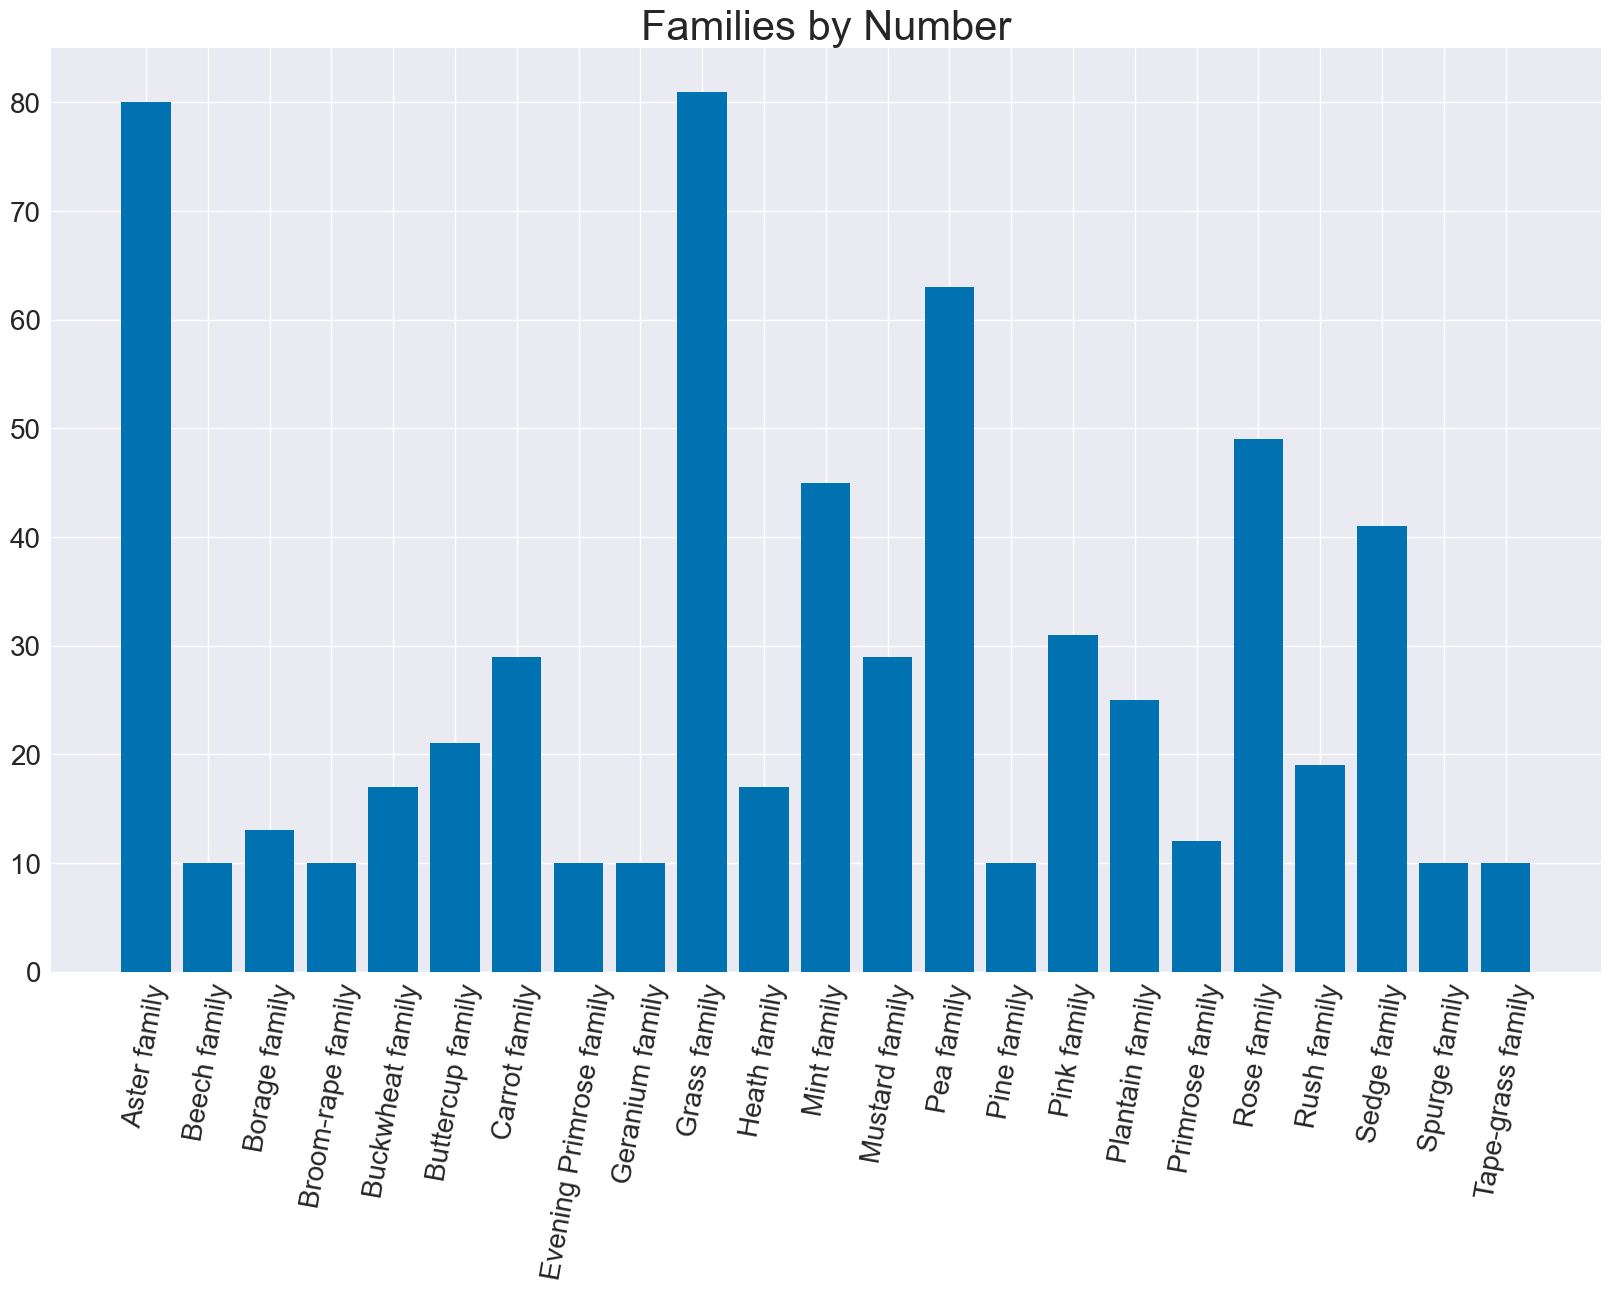

In [87]:
fig, ax = plt.subplots(figsize=(20, 12))

ax.bar(x=fam_names, height=fam_counts)
ax.set_title('Families by Number', fontsize=30)
plt.xticks(rotation=80, fontsize=20)
plt.yticks(fontsize=20);

In [88]:
del plant_dict[None]

In [89]:
plant_dict[None]

0

In [90]:
# What happened? Because of default dict.
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family': 3,
             'Honeys

In [91]:
del plant_dict[None]

In [92]:
plant_dict2.pop(None)
plant_dict2[None]

KeyError: None

In [93]:
plant_dict

defaultdict(int,
            {'Beech family': 10,
             'Nettle family': 2,
             'Grass family': 81,
             'Plantain family': 25,
             'Buttercup family': 21,
             'Pea family': 63,
             'Olive family': 5,
             'Rose family': 49,
             'Birch family': 7,
             'Rush family': 19,
             'Buckwheat family': 17,
             'Soapberry family': 7,
             'Pine family': 10,
             'Mint family': 45,
             'Madder family': 9,
             'Pink family': 31,
             'Carrot family': 29,
             'Geranium family': 10,
             'Aster family': 80,
             'Horsetail family': 7,
             'Heath family': 17,
             'Loosestrife family': 2,
             'Bracken Fern family': 1,
             'Mustard family': 29,
             'Evening Primrose family': 10,
             'Willow family': 3,
             'Polypody family': 7,
             'Dogwood family': 3,
             'Honeys

## Synonyms

In [94]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

Suppose we wanted to know how many synonymous names were listed for each plant. We could grab this number with a list comprehension:

In [95]:
num_syn = [len(plant['synonyms']) for plant in plants]

In [96]:
max(num_syn)

342

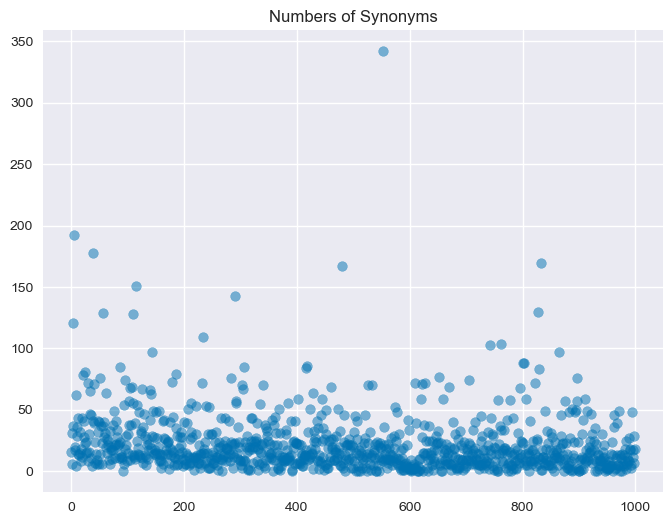

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(range(1000), num_syn, alpha=0.5)
ax.set_title('Numbers of Synonyms');

## Exercise

One plant has nearly 350 synonynms! What plant is this?

In [98]:
[plant['family_common_name']for plant in plants if len(plant['synonyms'])>200][0]

'Potato family'

<details>
    <summary>
        Answer
    </summary>

```python
[plant for plant in plants if len(plant['synonyms']) > 300]
```
</details>

## Bibliography

In [99]:
biblios = [plant['bibliography'] for plant in plants]

In [100]:
biblios[0]

'Encycl. 1: 723 (1785)'

Let's check the bibliographies for any explicit mention of Linnaeus, the godfather of biological taxonomy. First we'll remove the plants with no bibliography:

In [101]:
hasbiblio = [plant for plant in plants if plant['bibliography'] != None]

In [102]:
hasbiblio

[{'id': 678281,
  'common_name': 'Evergreen oak',
  'slug': 'quercus-rotundifolia',
  'scientific_name': 'Quercus rotundifolia',
  'year': 1785,
  'bibliography': 'Encycl. 1: 723 (1785)',
  'author': 'Lam.',
  'status': 'accepted',
  'rank': 'species',
  'family_common_name': 'Beech family',
  'genus_id': 5778,
  'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
  'synonyms': ['Quercus lyauteyi',
   'Quercus rotundifolia f. crassicupulata',
   'Quercus ballota',
   'Quercus ilex f. brevicupulata',
   'Quercus calycina',
   'Quercus rotundifolia f. dolichocalyx',
   'Quercus rotundifolia f. pilosella',
   'Quercus rotundifolia f. macrocarpa',
   'Quercus rotundifolia f. calycina',
   'Quercus ilex f. macrocarpa',
   'Quercus ilex subsp. ballota',
   'Quercus rotundifolia var. pilosella',
   'Quercus rotundifolia var. brevicupulata',
   'Quercus rotundifolia subsp. maghrebiana',
   'Quercus rotundifolia f. brevicupulata',
   'Quercus rotundifolia va

In [103]:
len(hasbiblio)

994

In [104]:
linnaeans = [plant['bibliography'] for plant in hasbiblio if 'Linnaeus' in plant['bibliography']]
linnaeans

['Linnaeus, C. (1753). Species plantarum, exhibentes plantas rite cognitas ad genera relatas cum differentiis specificis, nominibus trivialibus, synonymis selectis, locis natalibus, secundum systema sexuale digestas. Stockholm.']

In [105]:
len(linnaeans)

1

# Matching Author and Bibliography

In fact, _Species Plantarum_ (1753) was written by Linnaeus, and "Sp. Pl." in these bibliographies is a reference to that master work. Let's check to see who the author is for these records whose bibliographies start with "Sp. Pl.":

In [106]:
sps = []
for plant in hasbiblio:
    if plant['bibliography'].startswith('Sp. Pl.'):
        sps.append(plant)
len(sps)

445

In [107]:
sps2 = []
for plant in hasbiblio:
    if "Sp. Pl." in plant['bibliography']:
        sps2.append(plant)

In [108]:
sps3 = []
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum']:
        if check in plant['bibliography']:
            sps3.append(plant)

In [109]:
len(sps)

445

In [110]:
len(sps2)

448

In [111]:
len(sps3)

450

In [112]:
sp_authors = [sp['author'] for sp in sps3]

In [113]:
sp_authors

['L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',
 'L.',

In [114]:
uniq_auth = list(set(sp_authors))
uniq_auth

[None,
 'L.',
 '(L.) L.',
 '(J.Presl & C.Presl) Parl.',
 'Willd.',
 'A.Haines (Linnaeus)']

In [115]:
uniq_auth[0]

In [116]:
counts = []
for author in uniq_auth:
    counts.append(sp_authors.count(author))

In [117]:
counts

[1, 444, 2, 1, 1, 1]

In [118]:
dict(zip(uniq_auth, counts))

{None: 1,
 'L.': 444,
 '(L.) L.': 2,
 '(J.Presl & C.Presl) Parl.': 1,
 'Willd.': 1,
 'A.Haines (Linnaeus)': 1}

## Exercise

Change the author to 'L.' (for 'Linnaeus') for all of these records.

In [119]:
sps = []
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum', 'L.']:
        if check in plant['bibliography']:
            sps.append(plant)

In [120]:
sp_authors = set([sp['author'] for sp in sps])
sp_authors

{'(Custer) Rchb.',
 '(J.Presl & C.Presl) Parl.',
 '(L.) L.',
 '(L.) Planch.',
 'A.Haines (Linnaeus)',
 'L.',
 None,
 'Willd.'}

In [121]:
len(sps)

452

In [124]:
for plant in hasbiblio:
    for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum', 'L.']:
        if check in plant['bibliography']:
            plant['author']='L.'

In [125]:
Counter([plant['author'] for plant in hasbiblio])

Counter({'Lam.': 3,
         'L.': 526,
         'Jacq.': 3,
         '(L.) Maxim.': 1,
         '(Cav.) Trin. ex Steud.': 1,
         'Baumg.': 1,
         '(L.) Gaertn.': 3,
         'Roth': 3,
         '(L.) Drejer': 1,
         '(L.) P.Beauv.': 7,
         'Moench': 5,
         '(L.) Raeusch.': 1,
         '(Savi) Ten.': 1,
         '(L.) H.Karst.': 1,
         '(L.) Gould': 1,
         'Kuhn (L.)': 1,
         '(L.) Schott': 1,
         'Mill.': 14,
         '(L.) Rydb.': 1,
         '(L.) R.Br.': 5,
         '(L.) L.': 3,
         'Ehrh.': 7,
         'Schreb.': 4,
         '(L.) Holub': 4,
         '(L.) Greuter & Burdet': 1,
         'DC.': 10,
         'Vaill.': 1,
         '(L.) Hill': 4,
         '(M.Bieb.) Cavara & Grande': 1,
         '(Huds.) P.Beauv.': 1,
         'Cav.': 3,
         '(L.) Link': 1,
         '(L.) Moench': 4,
         'Aiton': 2,
         '(L.) Clairv.': 3,
         '(Vill.) H.P.Fuchs': 1,
         '(L.) Coult.': 1,
         'Poir.': 4,
         '(L.) U.

<details>
    <summary>
        Answer
    </summary>

```python
for plant in plants:
    try:
        for check in ['Sp. Pl.', 'Linnaeus', 'Species plantarum']:
            if check in plant['bibliography']:
                plant['author'] = 'L.'
    except:
        continue
```
</details>

# Teaser: Bringing in `pandas`: Back to Synonyms

Let's take advantage of the DataFrame tools from `pandas`:

In [126]:
# Need to first import pandas
import pandas as pd

In [127]:
plants_df = pd.DataFrame(plants)

In [128]:
plants[0]

{'id': 678281,
 'common_name': 'Evergreen oak',
 'slug': 'quercus-rotundifolia',
 'scientific_name': 'Quercus rotundifolia',
 'year': 1785,
 'bibliography': 'Encycl. 1: 723 (1785)',
 'author': 'Lam.',
 'status': 'accepted',
 'rank': 'species',
 'family_common_name': 'Beech family',
 'genus_id': 5778,
 'image_url': 'https://bs.plantnet.org/image/o/1a03948baf0300da25558c2448f086d39b41ca30',
 'synonyms': ['Quercus lyauteyi',
  'Quercus rotundifolia f. crassicupulata',
  'Quercus ballota',
  'Quercus ilex f. brevicupulata',
  'Quercus calycina',
  'Quercus rotundifolia f. dolichocalyx',
  'Quercus rotundifolia f. pilosella',
  'Quercus rotundifolia f. macrocarpa',
  'Quercus rotundifolia f. calycina',
  'Quercus ilex f. macrocarpa',
  'Quercus ilex subsp. ballota',
  'Quercus rotundifolia var. pilosella',
  'Quercus rotundifolia var. brevicupulata',
  'Quercus rotundifolia subsp. maghrebiana',
  'Quercus rotundifolia f. brevicupulata',
  'Quercus rotundifolia var. macrocarpa'],
 'genus': '

In [129]:
plants_df.head()

,id,common_name,slug,scientific_name,year,bibliography,author,status,rank,family_common_name,genus_id,image_url,synonyms,genus,family,links
0,678281,Evergreen oak,quercus-rotundifolia,Quercus rotundifolia,1785.0,Encycl. 1: 723 (1785),Lam.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/1a03948baf0300...,"[Quercus lyauteyi, Quercus rotundifolia f. cra...",Quercus,Fagaceae,{'self': '/api/v1/species/quercus-rotundifolia...
1,190500,Stinging nettle,urtica-dioica,Urtica dioica,1753.0,Sp. Pl.: 984 (1753),L.,accepted,species,Nettle family,1028,https://bs.plantnet.org/image/o/85256a1c2c098e...,"[Urtica major, Urtica tibetica, Urtica sicula,...",Urtica,Urticaceae,"{'self': '/api/v1/species/urtica-dioica', 'pla..."
2,126957,Orchardgrass,dactylis-glomerata,Dactylis glomerata,1753.0,Sp. Pl.: 71 (1753),L.,accepted,species,Grass family,2284,https://bs.plantnet.org/image/o/428f40dadfa028...,"[Koeleria dactylis, Festuca glomerata, Trachyp...",Dactylis,Poaceae,"{'self': '/api/v1/species/dactylis-glomerata',..."
3,167888,Narrowleaf plantain,plantago-lanceolata,Plantago lanceolata,1753.0,Sp. Pl.: 113 (1753),L.,accepted,species,Plantain family,5418,https://bs.plantnet.org/image/o/78a8374f009e6e...,"[Plantago lanceolata var. sphaerostachya, Plan...",Plantago,Plantaginaceae,{'self': '/api/v1/species/plantago-lanceolata'...
4,173327,English oak,quercus-robur,Quercus robur,1753.0,Sp. Pl.: 996 (1753),L.,accepted,species,Beech family,5778,https://bs.plantnet.org/image/o/2292b670683abd...,"[Quercus longaeva, Quercus salicifolia, Quercu...",Quercus,Fagaceae,"{'self': '/api/v1/species/quercus-robur', 'pla..."


In [130]:
plants_df['family_common_name'].value_counts()

family_common_name
Grass family        81
Aster family        80
Pea family          63
Rose family         49
Mint family         45
                    ..
Melastome family     1
Boxwood family       1
Walnut family        1
Yam family           1
Leadwort family      1
Name: count, Length: 102, dtype: int64

In [135]:
counts=plants_df['family_common_name'].value_counts(ascending=False, normalize=True)

In [136]:
counts

family_common_name
Grass family        0.091319
Aster family        0.090192
Pea family          0.071026
Rose family         0.055242
Mint family         0.050733
                      ...   
Melastome family    0.001127
Boxwood family      0.001127
Walnut family       0.001127
Yam family          0.001127
Leadwort family     0.001127
Name: proportion, Length: 102, dtype: float64

In [137]:
list(counts.index)

['Grass family',
 'Aster family',
 'Pea family',
 'Rose family',
 'Mint family',
 'Sedge family',
 'Pink family',
 'Mustard family',
 'Carrot family',
 'Plantain family',
 'Buttercup family',
 'Rush family',
 'Buckwheat family',
 'Heath family',
 'Borage family',
 'Primrose family',
 'Spurge family',
 'Tape-grass family',
 'Evening Primrose family',
 'Broom-rape family',
 'Beech family',
 'Geranium family',
 'Pine family',
 'Bellflower family',
 'Madder family',
 'Honeysuckle family',
 'Stonecrop family',
 'Arum family',
 'Spleenwort family',
 'Horsetail family',
 'Polypody family',
 'Poppy family',
 'Pondweed family',
 'Soapberry family',
 'Birch family',
 'Potato family',
 'Gentian family',
 'Amaranth family',
 'Olive family',
 'Saxifrage family',
 'Mallow family',
 'Rock-rose family',
 'Currant family',
 'Manatee-grass family',
 'Cat-tail family',
 'Club-moss family',
 'Verbena family',
 'Dogbane family',
 'Brachythecium moss family',
 'Wood-Sorrel family',
 'Touch-me-not family',
 

In [133]:
list(counts.index)

['Grass family',
 'Aster family',
 'Pea family',
 'Rose family',
 'Mint family',
 'Sedge family',
 'Pink family',
 'Mustard family',
 'Carrot family',
 'Plantain family',
 'Buttercup family',
 'Rush family',
 'Buckwheat family',
 'Heath family',
 'Borage family',
 'Primrose family',
 'Spurge family',
 'Tape-grass family',
 'Evening Primrose family',
 'Broom-rape family',
 'Beech family',
 'Geranium family',
 'Pine family',
 'Bellflower family',
 'Madder family',
 'Honeysuckle family',
 'Stonecrop family',
 'Arum family',
 'Spleenwort family',
 'Horsetail family',
 'Polypody family',
 'Poppy family',
 'Pondweed family',
 'Soapberry family',
 'Birch family',
 'Potato family',
 'Gentian family',
 'Amaranth family',
 'Olive family',
 'Saxifrage family',
 'Mallow family',
 'Rock-rose family',
 'Currant family',
 'Manatee-grass family',
 'Cat-tail family',
 'Club-moss family',
 'Verbena family',
 'Dogbane family',
 'Brachythecium moss family',
 'Wood-Sorrel family',
 'Touch-me-not family',
 

In [138]:
list(counts.values)

[0.09131905298759865,
 0.09019165727170236,
 0.07102593010146561,
 0.0552423900789177,
 0.05073280721533258,
 0.046223224351747465,
 0.03494926719278467,
 0.03269447576099211,
 0.03269447576099211,
 0.02818489289740699,
 0.02367531003382187,
 0.02142051860202931,
 0.019165727170236752,
 0.019165727170236752,
 0.014656144306651634,
 0.013528748590755355,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.011273957158962795,
 0.010146561443066516,
 0.010146561443066516,
 0.010146561443066516,
 0.009019165727170236,
 0.009019165727170236,
 0.009019165727170236,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.007891770011273957,
 0.006764374295377677,
 0.006764374295377677,
 0.005636978579481398,
 0.005636978579481398,
 0.005636978579481398,
 0.005636978579481398,
 0.004509582863585118,
 0.004509582863585118,


In [ ]:
plants_df.loc[plants_df['author'] == "L."]

## Exercises for Later

1. Add the number of synonyms as a new column called "num_syn".
2. Sort the DataFrame by number of synonyms in descending order.
3. Grab the Image URL of the plant that has the fourth-highest number of synonyms.
4. Paste it into your browser and take a look!

<details>
    <summary>Answer here
    </summary>

```python
plants_df['num_syn'] = plants_df['synonyms'].map(len)
sorted = plants_df.sort_values('num_syn', ascending=False)
sorted.loc[3, 'image_url']
```
</details>

# Year

The year is an indication of when a valid name for the plant first appeared in print. Let's build a simple histogram of these years:

In [ ]:
fig, ax = plt.subplots()

ax.hist(plants_df[plants_df['year'] > 0]['year'], color='darkgreen');

## Exercise

How many plants have first been written about just in the last 20 years? Make a bar chart or pie chart that shows the distribution by family of these plants.

<details>
    <summary>
        One answer here
    </summary>

```python
recent = plants_df[plants_df['year'] >= 2001]
fig, ax = plt.subplots(1, 2, figsize=(14, 6)
ax[0].bar(recent['family_common_name'].value_counts().index,
       recent['family_common_name'].value_counts(),
      color='darkgreen')
ax[1].pie(recent['family_common_name'].value_counts(),
      labels=recent['family_common_name'].value_counts().index,
      radius=1.2, labeldistance=0.4, rotatelabels=True);
```    
</details>